In [7]:
import os
import json
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import csv

In [8]:
# Pembacaan Parameter Dataset
filename = "parameter.json"
with open(filename, 'r') as f:
    params = json.load(f)

In [9]:
rr_target = []
hr_target = []
rr_phase = []
hr_phase = []
ext_rr_phase = []
ext_hr_phase = []

with open('./preproc_fixed/rr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_target.append(lines)
        
with open('./preproc_fixed/hr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_target.append(lines)
with open('./preproc_fixed/rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_phase.append(lines)
        
with open('./preproc_fixed/hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_phase.append(lines)
with open('./preproc_fixed/ext_rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_rr_phase.append(lines)
        
with open('./preproc_fixed/ext_hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_hr_phase.append(lines)

In [10]:
rr_target_array = []
hr_target_array = []
rr_phase_array = []
hr_phase_array = []
ext_rr_phase_array = []
ext_hr_phase_array = []
for i in range(0, 80, 2):
    rr_target_array.append(rr_target[i])
    hr_target_array.append(hr_target[i])
    rr_phase_array.append(rr_phase[i])
    hr_phase_array.append(hr_phase[i])
    ext_rr_phase_array.append(ext_rr_phase[i])
    ext_hr_phase_array.append(ext_hr_phase[i])
    
rr_target_array = np.array(rr_target_array).astype(np.float64)
hr_target_array = np.array(hr_target_array).astype(np.float64)
rr_phase_array = np.array(rr_phase_array).astype(np.float64)
hr_phase_array = np.array(hr_phase_array).astype(np.float64)
ext_rr_phase_array = np.array(ext_rr_phase_array).astype(np.float64)
ext_hr_phase_array = np.array(ext_hr_phase_array).astype(np.float64)

In [11]:
print(rr_phase_array.shape)
print(hr_phase_array.shape)
print(rr_target_array.shape)
print(hr_target_array.shape)
print(ext_rr_phase_array.shape)
print(ext_hr_phase_array.shape)

(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)


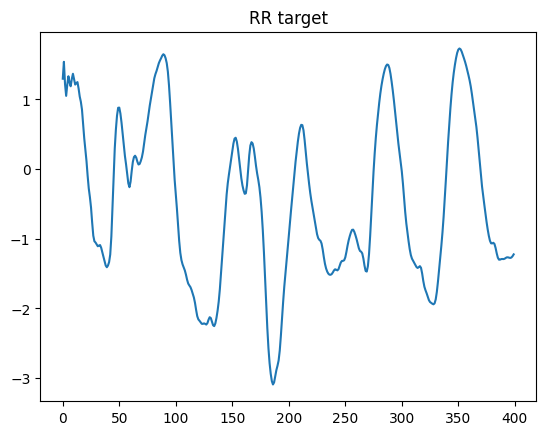

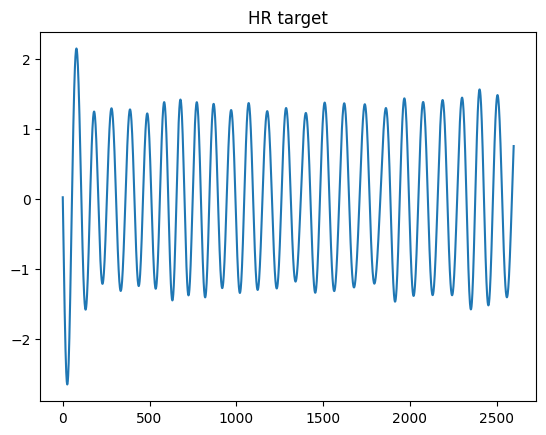

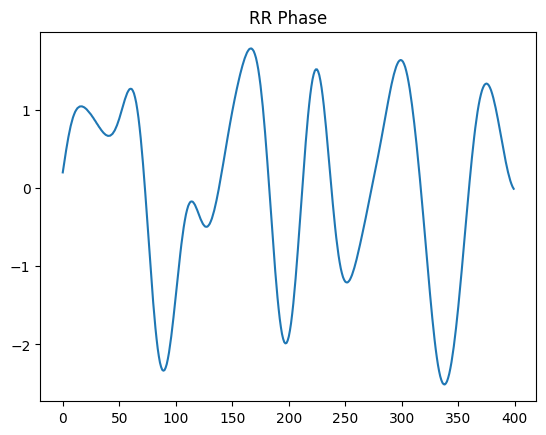

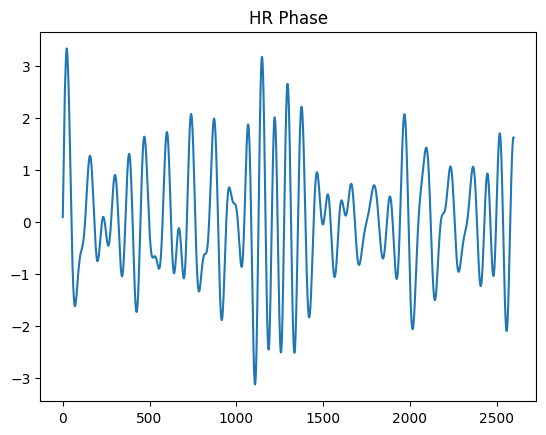

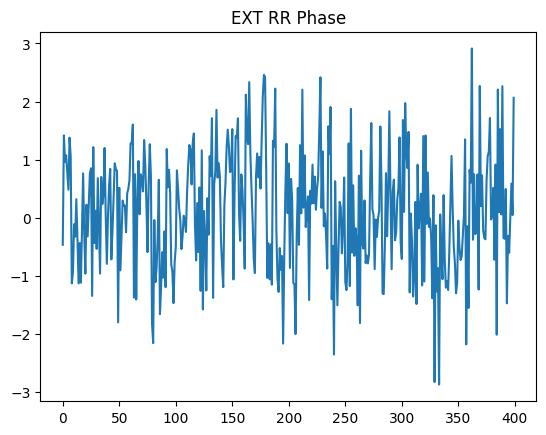

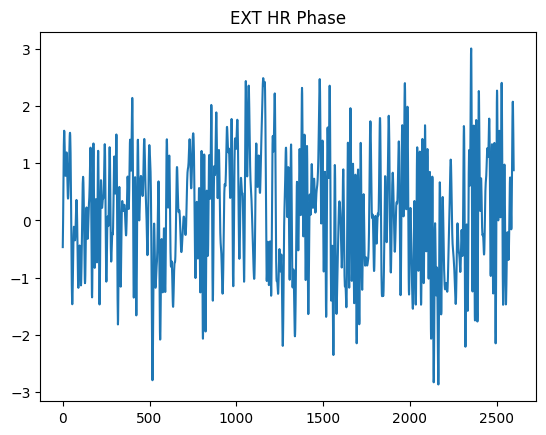

In [12]:
plt.figure(1)
plt.title("RR target")
plt.plot(rr_target_array[0][:400],label="RR target")
plt.figure(2)
plt.title("HR target")
plt.plot(hr_target_array[0][:2600],label="HR target")
plt.figure(3)
plt.title("RR Phase")
plt.plot(rr_phase_array[0][:400],label="RR Phase")
plt.figure(4)
plt.title("HR Phase")
plt.plot(hr_phase_array[0][:2600],label="HR Phase")
plt.figure(5)
plt.title("EXT RR Phase")
plt.plot(ext_rr_phase_array[0][:400],label="EXT RR Phase")
plt.figure(6)
plt.title("EXT HR Phase")
plt.plot(ext_hr_phase_array[0][:2600],label="EXT HR Phase")

In [13]:
def slide_win_rr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 380
            index_2 = index_1 + 400
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

def slide_win_hr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 2470
            index_2 = index_1 + 2600
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

In [14]:
rr_phase_array.shape

(40, 3000)

In [15]:
rr_phase_array

array([[ 0.19851798,  0.29616514,  0.39017934, ..., -1.3282585 ,
        -1.20323747, -1.07131805],
       [ 0.17570905,  0.0981841 ,  0.01910149, ...,  0.75166392,
         0.67454727,  0.59551284],
       [-0.6831842 , -0.48767653, -0.28439423, ...,  0.86665545,
         0.77990241,  0.68516211],
       ...,
       [ 0.20510292,  0.53432951,  0.84602113, ..., -0.67001866,
        -0.62294442, -0.56846216],
       [ 1.29502411,  0.98223297,  0.67348187, ...,  0.69764199,
         0.62879176,  0.55964625],
       [-1.13979803, -1.37827736, -1.60585038, ...,  1.0144359 ,
         0.90120427,  0.78337045]])

In [16]:
slide_rr_phase = np.array(slide_win_rr(rr_phase_array))
slide_hr_phase = np.array(slide_win_hr(hr_phase_array))
slide_rr_target = np.array(slide_win_rr(rr_target_array))
slide_hr_target = np.array(slide_win_hr(hr_target_array))
slide_ext_rr = np.array(slide_win_rr(ext_rr_phase_array))
slide_ext_hr = np.array(slide_win_hr(ext_hr_phase_array))

In [17]:
print(slide_rr_phase.shape, slide_rr_target.shape, slide_hr_phase.shape, slide_hr_target.shape, slide_ext_rr.shape, slide_ext_hr.shape)

(4040, 400) (4040, 400) (4040, 2600) (4040, 2600) (4040, 400) (4040, 2600)


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2
import keras_tuner

input_shape = (400, 1)  # Input shape dari data radar
output_shape = (400, 1)  # Output shape untuk sinyal detak jantung

# Tuning br
def build_model(hp):
    input_shape = (400, 1)
    inputs = layers.Input(shape=input_shape)
    
    conv1 = layers.Conv1D(
        filters=hp.Int('conv1_filters', 8, 32, step=8),
        kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
        activation=hp.Choice('act1', ['relu', 'linear']), 
        padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2, padding='same')(conv1)
    
    conv2 = layers.Conv1D(
        filters=hp.Int('conv2_filters', 16, 64, step=16),
        kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
        activation=hp.Choice('act2', ['relu', 'linear']), 
        padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2, padding='same')(conv2)

    conv3 = layers.Conv1D(
        filters=hp.Int('conv3_filters', 16, 64, step=16),
        kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
        activation=hp.Choice('act3', ['relu', 'linear']), 
        padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    pool3 = layers.MaxPooling1D(pool_size=2, padding='same')(conv3)
    
    
    conv4 = layers.Conv1D(
        filters=hp.Int('conv4_filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
        activation=hp.Choice('act4', ['relu', 'linear']), 
        padding='same')(pool3)
    conv4 = layers.BatchNormalization()(conv4)
    
    up5 = layers.Conv1DTranspose(filters=hp.Int('conv5T_filters', 16, 64, step=16),
                                 kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act5T', ['relu', 'linear']))(conv4)
    conv5 = layers.Conv1D(filters=hp.Int('conv5_filters', 16, 64, step=16),
                          kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]), 
                          activation=hp.Choice('act5', ['relu', 'linear']), 
                          padding='same')(up5)
    conv5 = layers.BatchNormalization()(conv5)

    up6 = layers.Conv1DTranspose(filters=hp.Int('conv6T_filters', 8, 32, step=8),
                                 kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act5T', ['relu', 'linear']))(conv5)
    conv6 = layers.Conv1D(filters=hp.Int('conv6_filters', 8, 32, step=8),
                          kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]), 
                          activation=hp.Choice('act6', ['relu', 'linear']), 
                          padding='same')(up6)
    conv6 = layers.BatchNormalization()(conv6)
    
    up7 = layers.Conv1DTranspose(filters=hp.Int('conv7T_filters', 8, 32, step=8),
                                 kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act5T', ['relu', 'linear']))(conv6)
    conv7 = layers.Conv1D(filters=hp.Int('conv7_filters', 8, 32, step=8),
                          kernel_size=hp.Choice('kernel_size', [5, 10, 15, 20, 25]), 
                          activation=hp.Choice('act7', ['relu', 'linear']), 
                          padding='same')(up7)
    conv7 = layers.BatchNormalization()(conv7)
    

    output = layers.Conv1D(1, 1, activation='linear')(conv7)

    model = Model(inputs, output)
    model.summary()
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse') 
    return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tuning_br4'
)

Reloading Tuner from tuner_results\tuning_br4\tuner0.json


In [19]:
rr_train = slide_rr_phase[:3200]
rr_test = slide_rr_phase[3200:]
rr_target_train = slide_rr_target[:3200]
rr_target_test = slide_rr_target[3200:]

In [20]:
print(rr_train.shape)
print(rr_test.shape)
print(rr_target_train.shape)
print(rr_target_test.shape)

(3200, 400)
(840, 400)
(3200, 400)
(840, 400)


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2
import keras_tuner

input_shape = (400, 1)  # Input shape dari data radar
output_shape = (400, 1)  # Output shape untuk sinyal detak jantung
# Tuning br
def build_model(hp):
    input_shape = (400, 1)
    inputs = layers.Input(shape=input_shape)
    
    conv1 = layers.Conv1D(
        filters=hp.Int('conv1_filters', 8, 32, step=8),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act1', ['relu', 'linear']), 
        padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2, padding='same')(conv1)
    
    conv2 = layers.Conv1D(
        filters=hp.Int('conv2_filters', 16, 64, step=16),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act2', ['relu', 'linear']), 
        padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2, padding='same')(conv2)
    
    
    conv3 = layers.Conv1D(
        filters=hp.Int('conv3_filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act3', ['relu', 'linear']), 
        padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    
    up4 = layers.Conv1DTranspose(filters=hp.Int('conv4T_filters', 16, 64, step=16),
                                 kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act4T', ['relu', 'linear']))(conv3)
    conv4 = layers.Conv1D(filters=hp.Int('conv4_filters', 16, 64, step=16),
                          kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]), 
                          activation=hp.Choice('act4', ['relu', 'linear']), 
                          padding='same')(up4)
    conv4 = layers.BatchNormalization()(conv4)

    up5 = layers.Conv1DTranspose(filters=hp.Int('conv5T_filters', 8, 32, step=8),
                                 kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act5T', ['relu', 'linear']))(conv4)
    conv5 = layers.Conv1D(filters=hp.Int('conv5_filters', 8, 32, step=8),
                          kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]), 
                          activation=hp.Choice('act5', ['relu', 'linear']), 
                          padding='same')(up5)
    conv5 = layers.BatchNormalization()(conv5)
    

    output = layers.Conv1D(1, 1, activation='linear')(conv5)

    model = Model(inputs, output)
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(optimizer=RMSprop(learning_rate=lr), loss='mse') 
    return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tuning_rr2'
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
tuner.search(rr_train[:2400], rr_target_train[:2400], epochs=50, validation_data=(rr_train[2400:], rr_target_train[2400:]))
best_model = tuner.get_best_models(num_models=30)
# best_model.summary()

Trial 30 Complete [00h 01m 03s]
val_loss: 0.9948155283927917

Best val_loss So Far: 0.9913986325263977
Total elapsed time: 00h 35m 43s


d:\Python310\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[2]
# print(f"Best hyperparameters:")
# print(f" - Filters: {best_hps.get('filters')}")
# print(f" - Kernel Size: {best_hps.get('kernel_size')}")
# print(f" - Dilation Rates: {best_hps.get('dilation1')}, {best_hps.get('dilation2')}, {best_hps.get('dilation3')}, {best_hps.get('dilation4')}, {best_hps.get('dilation5')}")
# print(f" - Activation: {best_hps.get('activation1')}, {best_hps.get('activation2')}, {best_hps.get('activation3')}, {best_hps.get('activation4')}, {best_hps.get('activation5')}")
# print(f" - Learning Rate: {best_hps.get('learning_rate')}")

In [24]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
# best_model_ = tuner.hypermodel.build(best_hps)
# # === Train Best Model ===
# history = best_model_.fit(
#     rr_train, rr_target_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=32,
#     verbose=1,
#     # callbacks=[
#     #     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     # ]
# )

In [168]:
best_hp = tuner.get_best_hyperparameters(num_trials=50)

In [233]:
best_model[12].save("rr_model_tuner.h5")
# best_model[18].save("rr_model_tuner.h5")
# best_model[12].save("rr_model_tuner.h5")
# best_model[25].save("rr_model_tuner.h5")
# best_model[29].save("rr_model_tuner.h5")
# best_model[23].save("rr_model_tuner.h5")
# best_model[5].save("rr_model_tuner.h5")

In [234]:
print("Best Hyperparameters:")
for param in best_hp[12].values:
    print(f"{param}: {best_hp[12].get(param)}")

Best Hyperparameters:
conv1_filters: 32
kernel_size: 20
act1: relu
conv2_filters: 16
act2: relu
conv3_filters: 128
act3: relu
conv4T_filters: 64
act4T: relu
conv4_filters: 64
act4: linear
conv5T_filters: 16
act5T: linear
conv5_filters: 24
act5: linear
learning_rate: 0.0008312406229341659


In [235]:
from tensorflow.keras.models import load_model

rr_predict = load_model("rr_model_tuner.h5", custom_objects={'mse': 'mean_squared_error'})

An1_RR = np.array(rr_predict(rr_test[0].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An2_RR = np.array(rr_predict(rr_test[1].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An3_RR = np.array(rr_predict(rr_test[2].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An4_RR = np.array(rr_predict(rr_test[3].reshape(1, -1, 1).astype(np.float64))[0,:,0])

In [241]:
rr_test[0].shape

(400,)

In [27]:
# from tensorflow.keras.utils import plot_model
# plot_model(rr_predict, to_file='br_tuner.png', show_shapes=True, show_layer_names=True)

In [58]:
An1_RR[:400].shape

(400,)

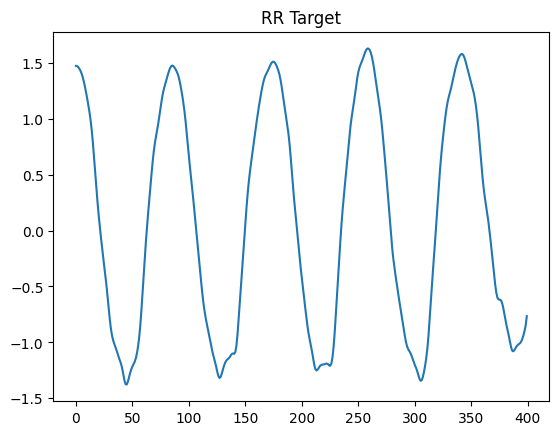

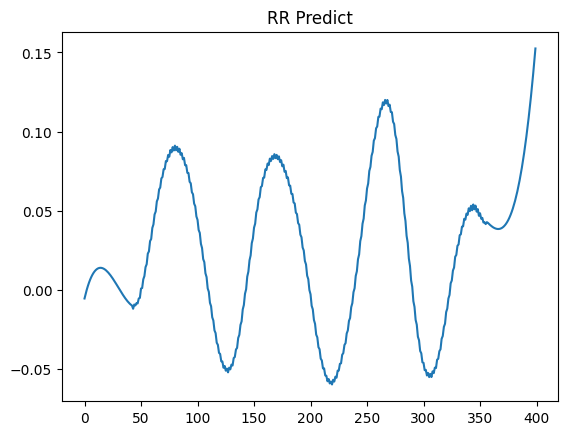

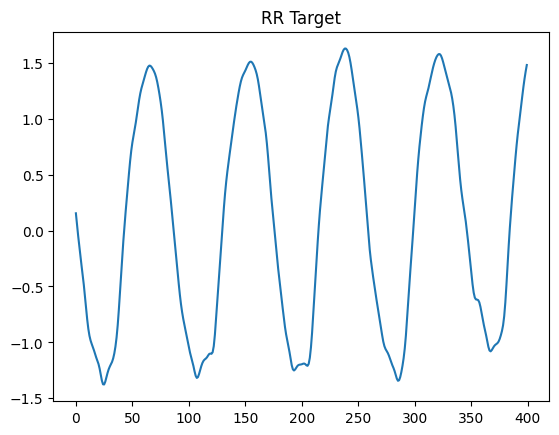

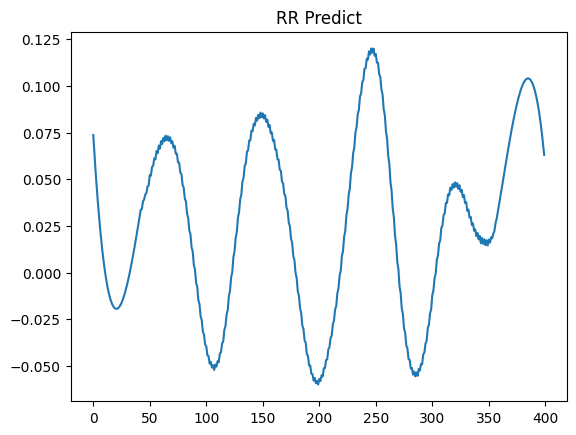

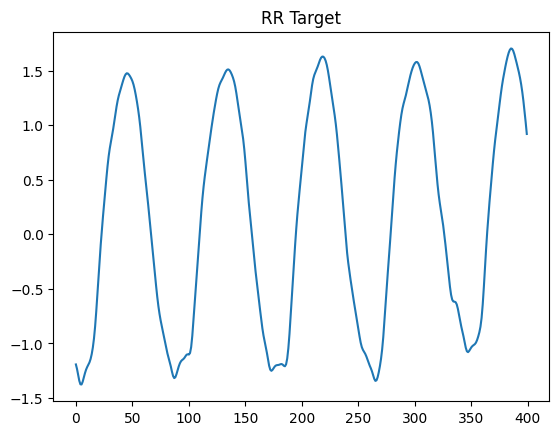

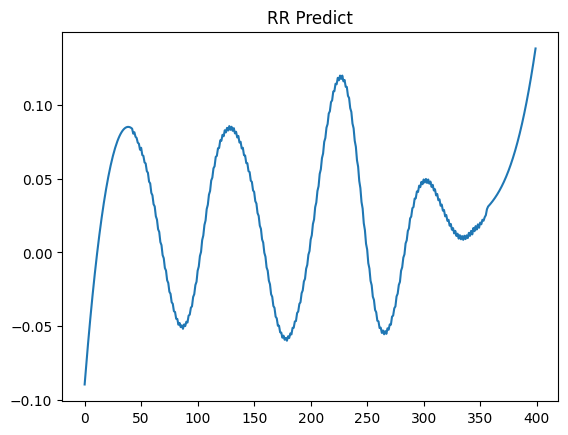

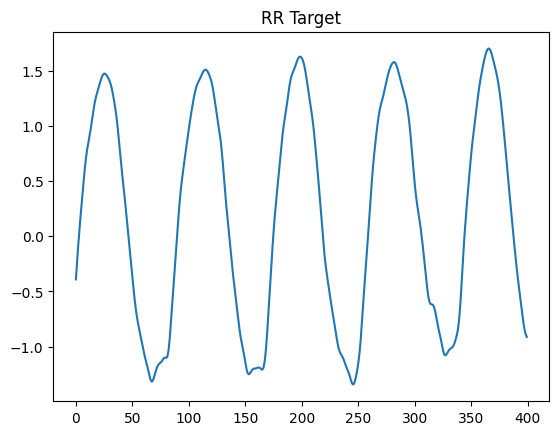

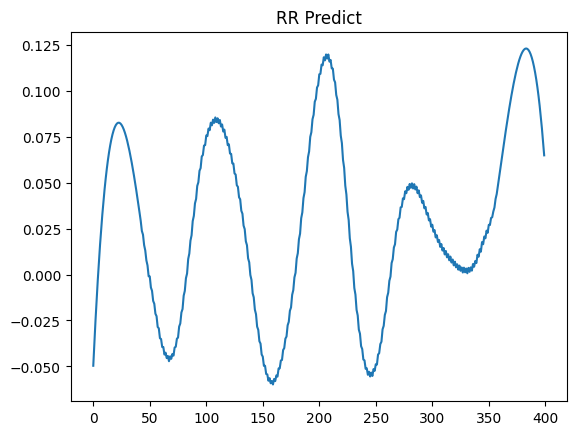

In [236]:
from scipy.signal import savgol_filter
plt.figure(1)
plt.title("RR Target")
plt.plot(rr_target_test[0][:400],label="RR Target")
plt.figure(2)
plt.title("RR Predict")
plt.plot(savgol_filter(An1_RR.squeeze(), window_length=85, polyorder=3),label="RR Predict")
plt.figure(3)
plt.title("RR Target")
plt.plot(rr_target_test[1][:400],label="RR Target")
plt.figure(4)
plt.title("RR Predict")
plt.plot(savgol_filter(An2_RR.squeeze(), window_length=85, polyorder=3),label="RR Predict")
plt.figure(5)
plt.title("RR Target")
plt.plot(rr_target_test[2][:400],label="RR Target")
plt.figure(6)
plt.title("RR Predict")
plt.plot(savgol_filter(An3_RR.squeeze(), window_length=85, polyorder=3),label="RR Predict")
plt.figure(7)
plt.title("RR Target")
plt.plot(rr_target_test[3][:400],label="RR Target")
plt.figure(8)
plt.title("RR Predict")
plt.plot(savgol_filter(An4_RR.squeeze(), window_length=85, polyorder=3),label="RR Predict")

In [30]:
import math
from sklearn.metrics import mean_squared_error
def RMSE(actual, predicted):
    y_actual = actual
    y_predicted =predicted
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE = math.sqrt(MSE)
    return np.round(RMSE,2)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    m =np.mean(np.abs(y_true - predictions))
    return np.round(m,2)
def round_data(data):
    f = np.array([round(x) for x in data]).astype(int)
    return f 

In [237]:
predicted = []

for i in range(len(rr_test)):
    y_pred = np.array(rr_predict(rr_test[i].reshape(1, -1, 1).astype(np.float64))[0,:,0])
    predicted.append(savgol_filter(y_pred.squeeze(), window_length=51, polyorder=3))
    
predicted = np.array(predicted)

In [32]:
predicted.shape

(840, 400)

In [33]:
rr_target_test.shape

(840, 400)

In [34]:
import numpy as np
import scipy.fftpack as fftpack
# Temporal bandpass filter with Fast-Fourier Transform
def fft_filter(data, freq_min, freq_max, fs):
    fft = fftpack.fft(data, axis=0)
    frequencies = fftpack.fftfreq(data.shape[0], d=1.0 / fs)
    bound_low = (np.abs(frequencies - freq_min)).argmin()
    bound_high = (np.abs(frequencies - freq_max)).argmin()
    fft[:bound_low] = 0
    fft[bound_high:-bound_high] = 0
    fft[-bound_low:] = 0
    iff = fftpack.ifft(fft, axis=0)
    result = np.abs(iff)
    result *= 100  # Amplification factor

    return result, fft, frequencies

In [35]:
from scipy import signal
# Calculate heart rate from FFT peaks
def find_heart_rate(fft, freqs, freq_min, freq_max):
    fft_maximums = []

    for i in range(fft.shape[0]):
        if freq_min <= freqs[i] <= freq_max:
            fftMap = abs(fft[i])
            fft_maximums.append(fftMap.max())
        else:
            fft_maximums.append(0)

    peaks, properties = signal.find_peaks(fft_maximums)
    max_peak = -1
    max_freq = 0

    # Find frequency with max amplitude in peaks
    for peak in peaks:
        if fft_maximums[peak] > max_freq:
            max_freq = fft_maximums[peak]
            max_peak = peak

    return freqs[max_peak] * 60

In [36]:
# Kalman 
def kalman_filter(z_ppg1):

    Q=20**2
    R=2**2

    count=0
    countmax=5
    imax=3

    xposteriori=z_ppg1[0]
    res = np.zeros(len(z_ppg1))
    res[0]=z_ppg1[0]
    Pposteriori=0
    hasil =[]

    for i in range (1, len(z_ppg1)):

        xpriori=xposteriori
        Ppriori=Pposteriori+Q

        S=Ppriori+R
        gain=Ppriori/S

        inn1=z_ppg1[i]-xpriori

        if (((count==countmax or i<imax) and ~np.isnan(inn1))):
            inn=inn1
            xposteriori=xpriori+gain*inn
            Pposteriori=(1-gain)*Ppriori
            if(count==countmax ):
                xposteriori=0.5*(z_ppg1[i]+xpriori)
            count=0

        else:
            count=count+1
            xposteriori=xpriori
            Pposteriori=Ppriori

        res[i]=xposteriori
        hasil.append(xposteriori)

    return hasil

In [116]:
def bpm_rr(data):
    hasil =[]
    for i in range(data.shape[0]):
        freq_min = 0.1
        freq_max = 0.5
        fs = 20
        result, fft, frequencies = fft_filter(data[i], freq_min, freq_max, fs)
        heart_rate = find_heart_rate(fft, frequencies, freq_min, freq_max)
        hasil.append(heart_rate)
    return hasil 

In [238]:
rr_bpm = np.array(bpm_rr(predicted))
rr_ref_bpm = np.array(bpm_rr(rr_target_test))

In [176]:
rr_ref_bpm.shape

(840,)

In [239]:
print(f"RMSE: {RMSE(rr_ref_bpm, rr_bpm)}")

RMSE: 4.59


In [224]:
for i in range(30):
    predicted = []

    for j in range(len(rr_test)):
        y_pred = np.array(best_model[i](rr_test[j].reshape(1, -1, 1).astype(np.float64))[0,:,0])
        predicted.append(savgol_filter(y_pred.squeeze(), window_length=51, polyorder=3))
        
    predicted = np.array(predicted)
    rr_bpm = np.array(bpm_rr(predicted))
    rr_ref_bpm = np.array(bpm_rr(rr_target_test))
    print(f"RMSE: {RMSE(rr_ref_bpm, rr_bpm)}")

RMSE: 5.47
RMSE: 5.36
RMSE: 5.01
RMSE: 6.24
RMSE: 4.85
RMSE: 5.39
RMSE: 6.92
RMSE: 4.8
RMSE: 5.42
RMSE: 5.37
RMSE: 6.03
RMSE: 6.32
RMSE: 4.59
RMSE: 4.88
RMSE: 4.94
RMSE: 4.75
RMSE: 7.69
RMSE: 6.5
RMSE: 4.88
RMSE: 5.46
RMSE: 6.65
RMSE: 5.26
RMSE: 6.82
RMSE: 5.07
RMSE: 6.84
RMSE: 5.75
RMSE: 5.72
RMSE: 5.33
RMSE: 6.69
RMSE: 6.22
